# Normal Equation

Method to solve for $\theta$ analytically instead of iteratively

Set $\frac{\partial}{\partial\theta_j}J(\theta) = ... = 0$

Solve for $\theta_0,\theta_1,...,\theta_n$

## Design Matrix

$m$ examples $(x^{(1)}, y^{(1)}), ..., (x^{(m)}, y^{(m)})$;  $n$ features

$X = \begin{bmatrix}
1 & (x^{(1)})^T\\ 
1 & (x^{(2)})^T\\ 
1 & (x^{(3)})^T\\ 
1 & (x^{(4)})^T\\ 
1 & ...
\end{bmatrix}$

spreading out the transposes

$y = \begin{bmatrix}
y^{(1)}\\ 
y^{(2)}\\ 
y^{(3)}\\ 
y^{(4)}\\ 
...\\
y^{(m)}\\ 
\end{bmatrix}$

## Solution
Use the Design Matrix

$\theta = (X^TX)^{-1}X^Ty$

- no need to choose $\alpha$
- don't need to iterate
- Need to compute inverse
    - slow if n (number of features) is large
    - usually ok if n < 10,000

use pinv (pseudoinverse)

- when the inverse is not available, return a pseudoinverse
- pinv(A) * A = identity


In [25]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [5]:
# get audi car price dataset
# https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes
dataset = pd.read_csv('data/audi.csv')
# get only A4's
dataset['model'] = dataset['model'].str.strip()
a4_dataset = dataset[dataset['model'] == "A4"]

In [10]:
input_data = np.array([np.ones(a4_dataset.shape[0]), a4_dataset.mileage, a4_dataset.engineSize])
input_data = input_data.transpose(1, 0);
output_data = np.array(a4_dataset.price)

In [18]:
# hypothesis funciton
def hypothesis_function(input_data, thetas):
    # transpose theta so it is now vertical and ready for multiplcation
    # multiply to find the prediction value
    return np.matmul(thetas.T, input_data)

# calculate best parameters for cost function
def normal_equation(X, y):
    transpose = np.transpose(X)
    inverse = np.linalg.pinv(np.matmul(transpose, X))
    return np.matmul(np.matmul(inverse, transpose), y)

In [21]:
_thetas = normal_equation(input_data, output_data)
print(thetas)

[ 9.66660407e+03 -2.29087591e-01  8.63686631e+03]


Text(0.5, 0, 'Price ($)')

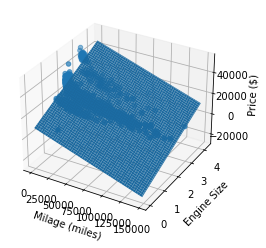

In [28]:
fig = plt.figure()
ax = plt.axes(projection="3d")

# scatter current data
ax.scatter3D(input_data[:,1], input_data[:,2], output_data)

# get plane x and y spaces
x_lin = np.linspace(np.min(input_data[:,1]), np.max(input_data[:,1]), input_data.shape[0])
y_lin = np.linspace(np.min(input_data[:,2]), np.max(input_data[:,2]), input_data.shape[0])

# z function
def calculate_z(x, y):
    return hypothesis_function([1, x, y], _thetas)

# create grid and plot surface
X, Y = np.meshgrid(x_lin, y_lin)
zs = calculate_z(np.ravel(X), np.ravel(Y))
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)

ax.set_xlabel("Milage (miles)")
ax.set_ylabel("Engine Size")
ax.set_zlabel("Price ($)")